https://arxiv.org/pdf/2211.10295.pdf

# 1 Initialize

In [1]:
visible_devices = [0]
import datetime
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if len(visible_devices) == 0:
        visible_devices = int(visible_devices) # type: ignore
    elif len(visible_devices) == 1:
        if len(visible_devices[0]) == 0: # type: ignore
            visible_devices = int(visible_devices[0])
        else:
            visible_devices = [int(i) for i in visible_devices[0]] # type: ignore
    else:
        visible_devices = [int(i) for i in visible_devices]
print("Visible devices:", visible_devices)
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

sys.path.insert(0,'../utils_func/')
import MixtureDistributions # type: ignore

sys.path.insert(0,'../')
import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std # type: ignore

print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
gpu_models = get_gpu_info()
if gpu_models:
    training_device = gpu_models[eval(os.environ["CUDA_VISIBLE_DEVICES"])]
    print("Successfully loaded GPU model: {}".format(training_device))
else:
    training_device = 'undetermined'
    print("Failed to load GPU model. Defaulting to 'undetermined'.")
    
results_dir = "../results/"
null_hypotheses_dir = "../results/null_hypotheses/"
if not os.path.exists(results_dir):
    print("WARNING: Results directory does not exist")
if not os.path.exists(null_hypotheses_dir):
    print("WARNING: Null hypotheses directory does not exist")
    
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2023-12-20 17:40:56.463314: Importing os...
2023-12-20 17:40:56.463576: Importing sys...
Visible devices: [0]
2023-12-20 17:40:56.464319: Importing timer from timeit...
2023-12-20 17:40:56.464498: Setting env variables for tf import (only device [0] will be available)...
2023-12-20 17:40:56.464806: Importing numpy...
2023-12-20 17:40:56.585355: Importing matplotlib...
2023-12-20 17:40:56.964246: Importing h5py...
2023-12-20 17:40:56.987687: Importing importlib.util...
2023-12-20 17:40:56.987802: Importing json...
2023-12-20 17:40:56.987869: Importing pandas...
2023-12-20 17:40:57.311546: Importing random...
2023-12-20 17:40:57.311735: Importing scipy utils...
2023-12-20 17:40:57.720530: Importing subprocess...
2023-12-20 17:40:57.720752: Importing tensorflow...
Tensorflow version: 2.12.0
2023-12-20 17:41:00.138294: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2023-12-20 17:41:00.402600: Importing timeit...
2023-12-20 17:41:00.402696: Importing tqdm...
2023

In [2]:
#seed = 0
#ndims = 5
#epsilon = 0.005
#GMetrics.utils.reset_random_seeds(seed)
#loc1 = np.array(np.zeros(ndims,dtype=np.float64),dtype=np.float64)
#scale1 = np.array(np.ones(ndims,dtype=np.float64),dtype=np.float64)
#loc2 = np.array(np.random.uniform(-epsilon,epsilon,ndims),dtype=np.float64)
#scale2 = np.array(np.random.uniform(1-epsilon,1+epsilon,ndims),dtype=np.float64)
#dist_1 = tfd.Independent(tfp.distributions.Normal(loc=loc1, scale=scale1), reinterpreted_batch_ndims=1)
#dist_2 = tfd.Independent(tfp.distributions.Normal(loc=loc2, scale=scale2), reinterpreted_batch_ndims=1)
#print(dist_1.dtype, dist_2.dtype)
#print('Types of distributions: ', type(dist_1), type(dist_2))
#print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
#print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
#print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

# Null hypotheses

In [2]:
seed = 0
ncomp = 3
ndims = 5
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)


## TensorFlow backend - w/o MirroredStrategy

In [3]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10_000,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 100000000
batch_size 10000
niter 10000
niter * batch_size 100000000
small_sample False


In [4]:
TwoSampleTestInputs.dist_1_num

<tf.Tensor: shape=(1, 0), dtype=float64, numpy=array([], shape=(1, 0), dtype=float64)>

In [5]:
TwoSampleTestInputs.dist_2_num

<tf.Tensor: shape=(1, 0), dtype=float64, numpy=array([], shape=(1, 0), dtype=float64)>

In [7]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
MultiKSTest = GMetrics.MultiKSTest(TwoSampleTestInputs,
                                   progress_bar = True,
                                   verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.


In [8]:
#d1 = np.array(TwoSampleTestInputs.dist_1_num).reshape(TwoSampleTestInputs.niter,TwoSampleTestInputs.batch_size_test,-1)
#d2 = np.array(TwoSampleTestInputs.dist_2_num).reshape(TwoSampleTestInputs.niter,TwoSampleTestInputs.batch_size_test,-1)
#print("------------------------------------------")
#print("Starting FPD metric calculation...")
#print("Running Jetnet FPD calculation...")
#print("niter = 10")
#print("batch_size = 10000")
#start = timer()
#FPDResult = [JMetrics.fpd(s1,s2)[0] for s1,s2 in zip(d1,d2)]
#end = timer()
#print(f"FPD metric calculation completed in {end-start} seconds.")

### FN Test

In [9]:
FNMetric.Test_tf(max_vectorize = 1000)
FNMetric.Results[-1].result_value


------------------------------------------
Starting FN metric calculation...
Running TF FN calculation...
niter = 10000
batch_size = 10000


The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 10
Iterating from 0 to 1000 out of 10000 .
Iterating from 1000 to 2000 out of 10000 .
Iterating from 2000 to 3000 out of 10000 .
Iterating from 3000 to 4000 out of 10000 .
Iterating from 4000 to 5000 out of 10000 .
Iterating from 5000 to 6000 out of 10000 .
Iterating from 6000 to 7000 out of 10000 .
Iterating from 7000 to 8000 out of 10000 .
Iterating from 8000 to 9000 out of 10000 .
Iterating from 9000 to 10000 out of 10000 .
FN metric calculation completed in 271.8309559626505 seconds.


{'metric_list': array([0.01552758, 0.03811105, 0.01363928, ..., 0.08682826, 0.03864557,
        0.03769599])}

In [10]:
FNMetric.Results[0].__dict__

{'timestamp': '2023-12-20T17:47:51.916349',
 'test_name': 'FN Test_tf',
 'is_symb_1': True,
 'is_symb_2': True,
 'ndims': 5,
 'niter': 10000,
 'batch_size_test': 10000,
 'batch_size_gen': 100,
 'dtype': 'float64',
 'small_sample_threshold': 10000000,
 'small_sample': False,
 'niter_used': 10000,
 'batch_size_test_used': 10000,
 'computing_time': 271.8309559626505,
 'backend': 'tensorflow',
 'result_value': {'metric_list': array([0.01552758, 0.03811105, 0.01363928, ..., 0.08682826, 0.03864557,
         0.03769599])}}

In [11]:
FNMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_FN.json")

OSError: [Errno 122] Disk quota exceeded

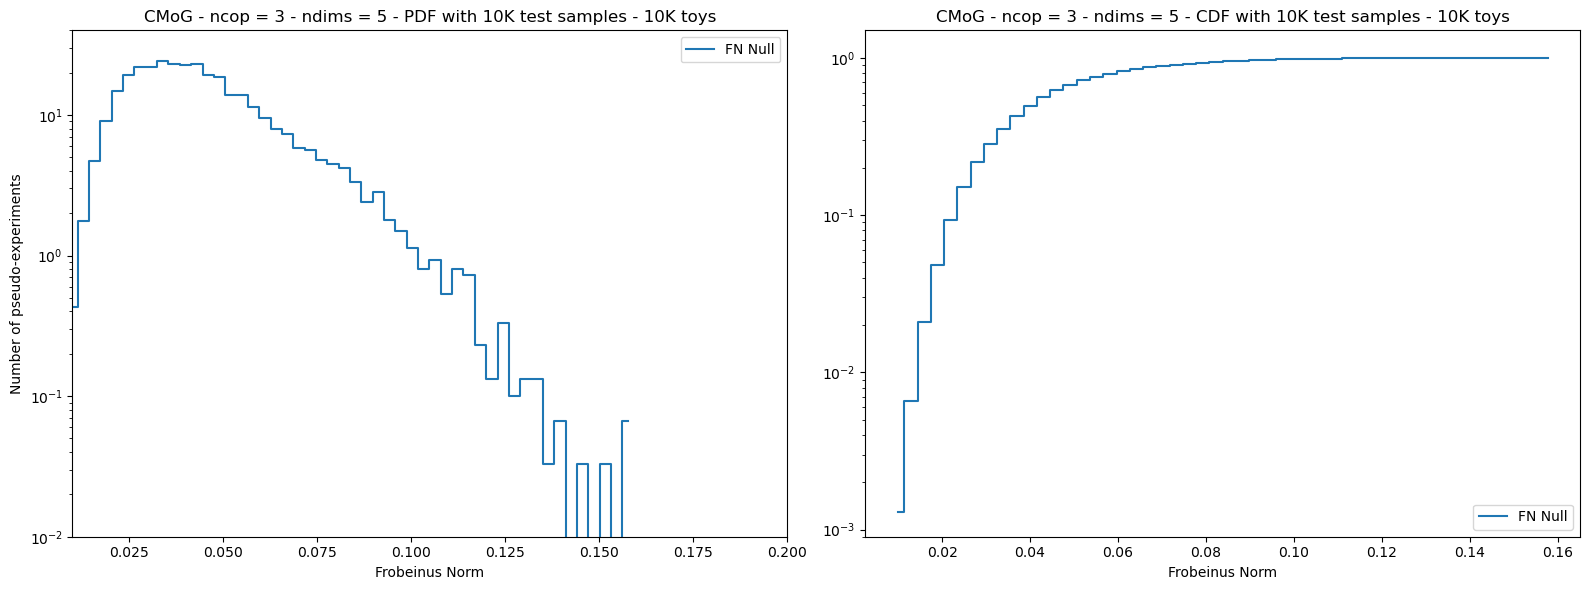

Time elapsed: 1.2134301261976361 seconds.


In [ ]:
start = timer()

nsamples = FNMetric.Inputs.batch_size_test
niter = FNMetric.Inputs.niter

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(FNMetric.Results[-1].result_value["metric_list"])
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=0.155)
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=0.155)
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
ax[0].set_xlim(0.01, 0.2)
ax[0].set_ylim(0.01, 40)
ax[0].set_xlabel('Frobeinus Norm')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
ax[0].set_xlim(0.01, 0.2)
ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Frobeinus Norm')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
[[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]

[[0.68, [6800, 3199], 0.050769989042148383],
 [0.95, [9500, 500], 0.0849895503156178],
 [0.99, [9900, 100], 0.10813116088943721]]

### KS Test

In [ ]:
KSTest.Test_tf(max_vectorize=1000)
KSTest.Results[-1].result_value


------------------------------------------
Starting KS tests calculation...
Running TF KS tests...
niter = 10000
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 50
Iterating from 0 to 200 out of 10000 .
Iterating from 200 to 400 out of 10000 .
Iterating from 400 to 600 out of 10000 .
Iterating from 600 to 800 out of 10000 .
Iterating from 800 to 1000 out of 10000 .
Iterating from 1000 to 1200 out of 10000 .
Iterating from 1200 to 1400 out of 10000 .
Iterating from 1400 to 1600 out of 10000 .
Iterating from 1600 to 1800 out of 10000 .
Iterating from 1800 to 2000 out of 10000 .
Iterating from 2000 to 2200 out of 10000 .
Iterating from 2200 to 2400 out of 10000 .
Iterating from 2400 to 2600 out of 10000 .
Iterating from 2600 to 2800 out of 10000 .
Iterating from 2800 to 3000 out of 10000 .
Iterating from 3000 to 3200 out of 10000 .

{'statistic_lists': array([[0.01569998, 0.01290002, 0.01129997, 0.01810002, 0.01280004],
        [0.00849998, 0.0117    , 0.01620001, 0.0174    , 0.01019999],
        [0.01410002, 0.00629997, 0.00880003, 0.00960001, 0.00769997],
        ...,
        [0.00870001, 0.00739999, 0.0237    , 0.00830001, 0.0174    ],
        [0.01319999, 0.01429999, 0.0124    , 0.01660001, 0.0149    ],
        [0.0115    , 0.00950003, 0.01299998, 0.01109999, 0.01570004]]),
 'statistic_means': array([0.01416001, 0.0128    , 0.0093    , ..., 0.0131    , 0.01428   ,
        0.01216001]),
 'statistic_stds': array([0.00242949, 0.00344035, 0.0026435 , ..., 0.00641467, 0.00144693,
        0.00209151]),
 'pvalue_lists': array([[0.16993111, 0.3761487 , 0.54572397, 0.07554591, 0.38572848],
        [0.86290359, 0.50040638, 0.14491093, 0.09685266, 0.67563349],
        [0.273206  , 0.98877037, 0.83351439, 0.74613714, 0.928262  ],
        ...,
        [0.84356195, 0.94709402, 0.00727177, 0.8811397 , 0.09685266],
        [0

In [ ]:
KSTest.Results.save_to_json(null_hypotheses_dir+"Null_5D_KS.json")

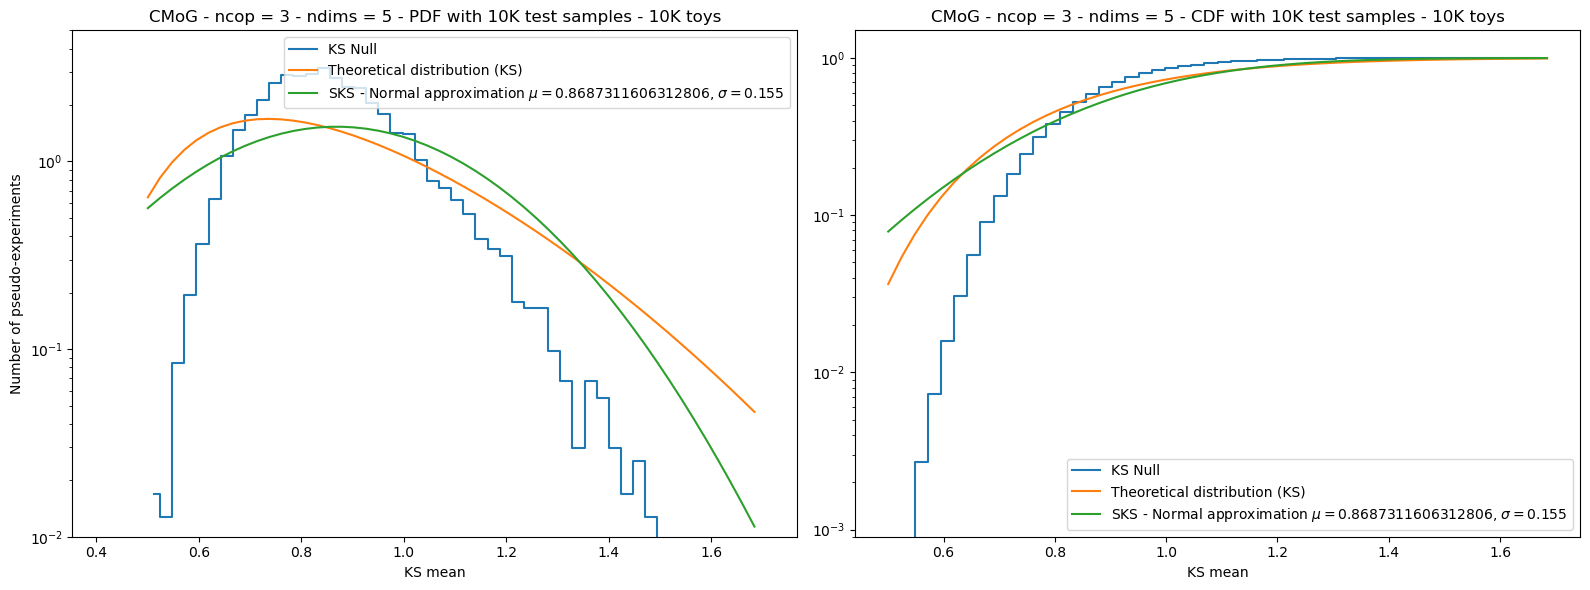

Time elapsed: 0.9893875047564507 seconds.


In [ ]:
start = timer()

nsamples = KSTest.Inputs.batch_size_test
niter = KSTest.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(KSTest.Results[-1].result_value["statistic_means"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
theoretical_pdf_ks = kstwobign.pdf(x)
theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='KS Null', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
ax[0].set_ylim(0.01, 5)
ax[0].set_xlabel('KS mean')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='KS Null', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('KS mean')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
[[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]

[[0.68, [6800, 3199], 0.9149967015224115],
 [0.95, [9500, 500], 1.1313706138761246],
 [0.99, [9900, 100], 1.2855206049622938]]

### LR Test

In [ ]:
LRMetric.Test_tf()
LRMetric.Results[-1].result_value


------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.


InvalidArgumentError: {{function_node __wrapped__ConcatV2_N_5_device_/job:localhost/replica:0/task:0/device:GPU:0}} ConcatOp : Can't concatenate scalars (use tf.stack instead) [Op:ConcatV2] name: concat

### MultiKS Test

In [ ]:
MultiKSTest.Test_tf()
MultiKSTest.Results[-1].result_value


------------------------------------------
Starting MultiKS tests calculation...
Running TF MultiKS tests...
niter = 10000
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
MultiKS tests calculation completed in 479.6496071284637 seconds.


{'metric_list': array([0.01270001, 0.0169    , 0.01650003, ..., 0.01989999, 0.01179999,
        0.0131    ])}

In [ ]:
MultiKSTest.Results.save_to_json(null_hypotheses_dir+"Null_5D_MultiKS.json")

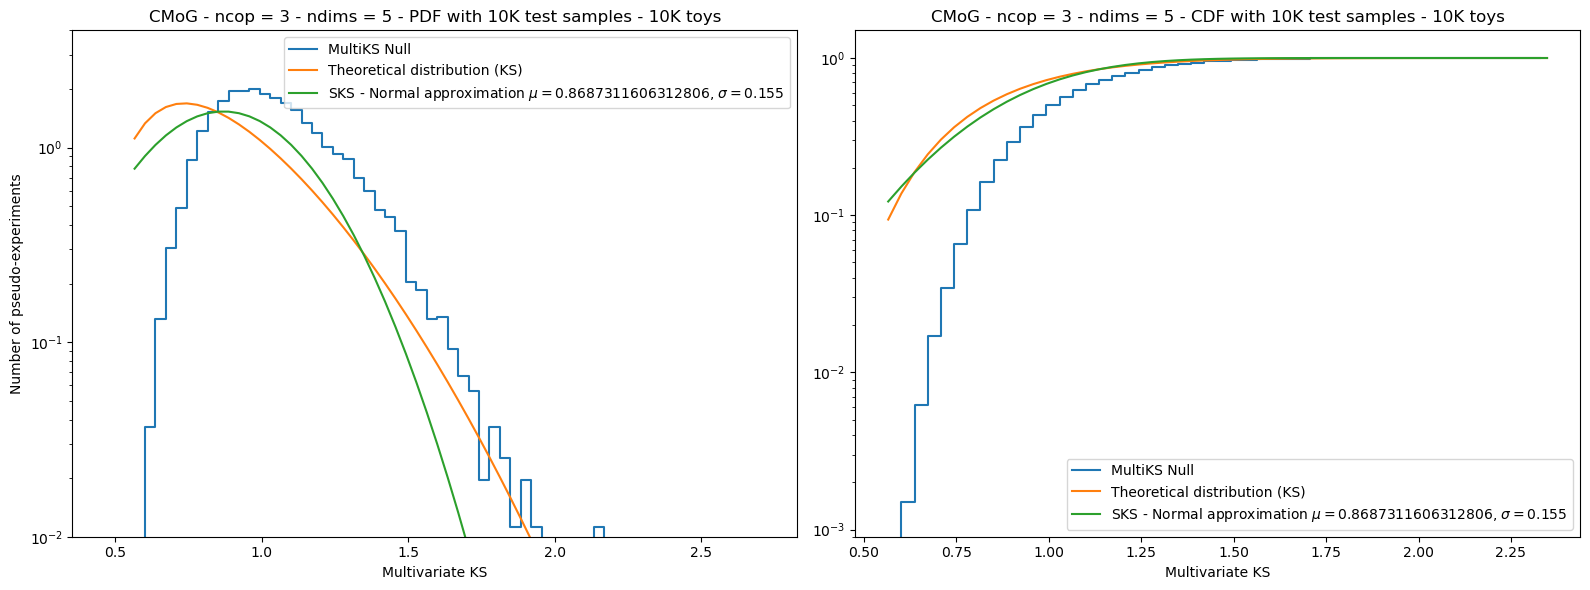

Time elapsed: 1.3849453534930944 seconds.


In [ ]:
start = timer()

nsamples = MultiKSTest.Inputs.batch_size_test
niter = MultiKSTest.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(MultiKSTest.Results[-1].result_value["metric_list"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
theoretical_pdf_ks = kstwobign.pdf(x)
theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='MultiKS Null', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
ax[0].set_xlim(0.005*np.sqrt(ns), 0.04*np.sqrt(ns))
ax[0].set_ylim(0.01, 4)
ax[0].set_xlabel('Multivariate KS')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='MultiKS Null', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
ax[0].set_xlim(0.005*np.sqrt(ns), 0.04*np.sqrt(ns))
ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Multivariate KS')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
[[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]

[[0.68, [6800, 3199], 1.1313710353446096],
 [0.95, [9500, 500], 1.4566393387274343],
 [0.99, [9900, 100], 1.668772856652466]]

### SKS Test

In [ ]:
#tf.config.run_functions_eagerly(True)#
SKSTest.Test_tf(max_vectorize=100)
SKSTest.Results[-1].result_value


------------------------------------------
Starting SKS metric calculation...
Running TF SKS calculation...
niter = 10000
batch_size = 10000


The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 100
Iterating from 0 to 100 out of 10000 .


KeyboardInterrupt: 

In [ ]:
SKSTest.Results.save_to_json(null_hypotheses_dir+"Null_5D_SKS.json")

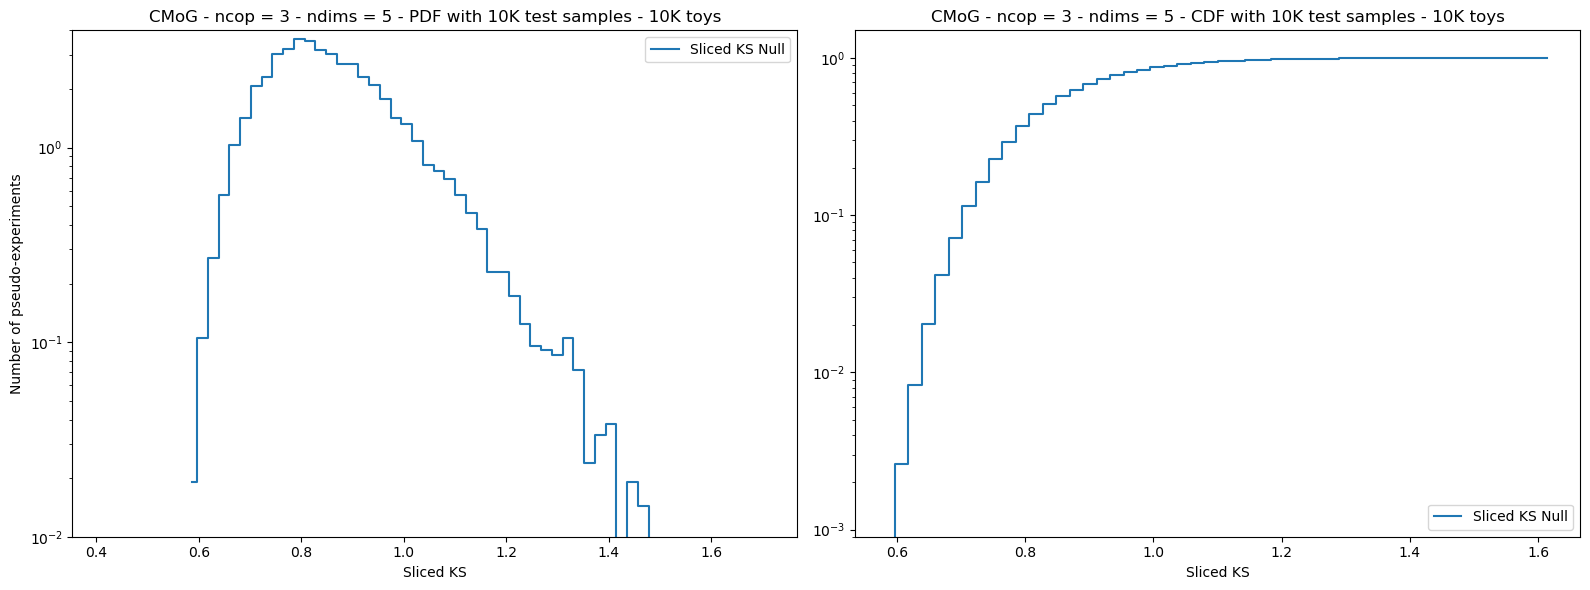

Time elapsed: 0.8842346649616957 seconds.


In [ ]:
start = timer()

nsamples = SKSTest.Inputs.batch_size_test
niter = SKSTest.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(SKSTest.Results[-1].result_value["metric_means"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=0.155)
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=0.155)
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Sliced KS Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
ax[0].set_ylim(0.01, 4)
ax[0].set_xlabel('Sliced KS')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Sliced KS Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Sliced KS')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
[[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]

[[0.68, [6800, 3199], 0.9094811805338137],
 [0.95, [9500, 500], 1.112986448315256],
 [0.99, [9900, 100], 1.2742067049480295]]

### SWD Test

In [ ]:
SWDMetric.Test_tf(max_vectorize=100)
SWDMetric.Results[-1].result_value


------------------------------------------
Starting SWD metric calculation...
Running TF SWD calculation...
niter = 10000
batch_size = 10000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 100
Iterating from 0 to 100 out of 10000 .
Iterating from 100 to 200 out of 10000 .
Iterating from 200 to 300 out of 10000 .
Iterating from 300 to 400 out of 10000 .
Iterating from 400 to 500 out of 10000 .
Iterating from 500 to 600 out of 10000 .
Iterating from 600 to 700 out of 10000 .
Iterating from 700 to 800 out of 10000 .
Iterating from 800 to 900 out of 10000 .
Iterating from 900 to 1000 out of 10000 .
Iterating from 1000 to 1100 out of 10000 .
Iterating from 1100 to 1200 out of 10000 .
Iterating from 1200 to 1300 out of 10000 .
Iterating from 1300 to 1400 out of 10000 .
Iterating from 1400 to 1500 out of 10000 .
Iterating from 1500 to 1600 out of 10000 .

{'metric_lists': array([[0.02338964, 0.03584131, 0.02246182, ..., 0.02909319, 0.0250432 ,
         0.02696284],
        [0.02390645, 0.05674998, 0.02997008, ..., 0.04382279, 0.03203669,
         0.0265758 ],
        [0.0107009 , 0.01213264, 0.00887537, ..., 0.00974121, 0.01782131,
         0.01211845],
        ...,
        [0.01438919, 0.01492631, 0.0143    , ..., 0.01230497, 0.02647861,
         0.01905162],
        [0.02091003, 0.03012359, 0.02554663, ..., 0.02219499, 0.03490628,
         0.02302441],
        [0.02122921, 0.04445733, 0.01324268, ..., 0.03369493, 0.02286342,
         0.02436678]]),
 'metric_means': array([0.02549678, 0.03177499, 0.01083631, ..., 0.01699493, 0.02758391,
        0.02365367]),
 'metric_stds': array([0.01142653, 0.01643408, 0.00220378, ..., 0.00514303, 0.01100819,
        0.01260557])}

In [ ]:
SWDMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_SWD.json")

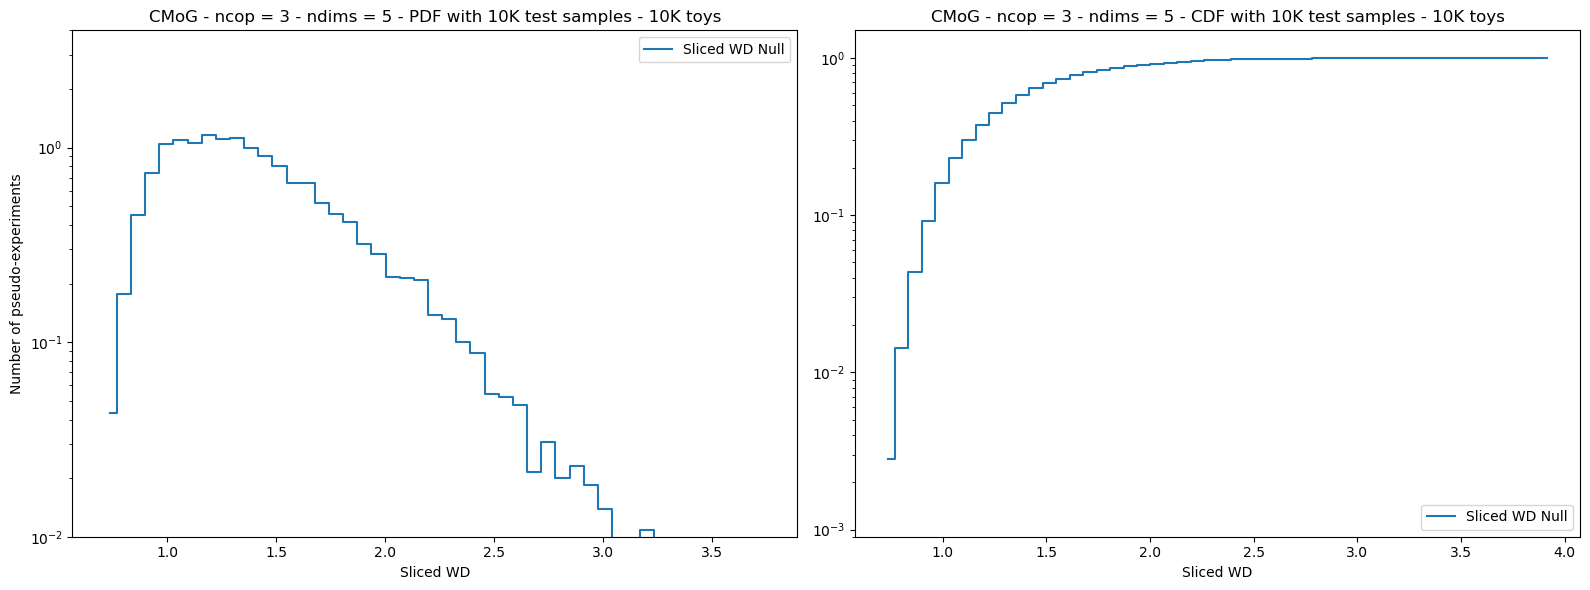

Time elapsed: 0.86298893019557 seconds.


In [ ]:
start = timer()

nsamples = SWDMetric.Inputs.batch_size_test
niter = SWDMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(SWDMetric.Results[-1].result_value["metric_means"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=0.155)
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=0.155)
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Sliced WD Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
ax[0].set_xlim(0.008*np.sqrt(ns), 0.055*np.sqrt(ns))
ax[0].set_ylim(0.01, 4)
ax[0].set_xlabel('Sliced WD')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Sliced WD Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
ax[0].set_xlim(0.008*np.sqrt(ns), 0.055*np.sqrt(ns))
ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Sliced WD')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
[[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]

[[0.68, [6800, 3199], 1.5309576275419419],
 [0.95, [9500, 500], 2.202632934055404],
 [0.99, [9900, 100], 2.709669622518888]]

### FPD Test

In [ ]:
FPDMetric.Test_np()
FPDMetric.Results[-1].result_value


------------------------------------------
Starting FPD metric calculation...
niter = 1000
batch_size = 10000


Iterations:   0%|          | 0/1000 [00:00<?, ?it/s]

Running numpy FPD calculation...


/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/jetnet/evaluation/gen_metrics.py:692: RuntimeWarning: Recommended number of samples for FPD estimation is 50,000
  warnings.warn("Recommended number of samples for FPD estimation is 50,000", RuntimeWarning)
Iterations:   9%|▉         | 88/1000 [01:41<16:28,  1.08s/it] 

In [ ]:
FPDMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_FPD.json")

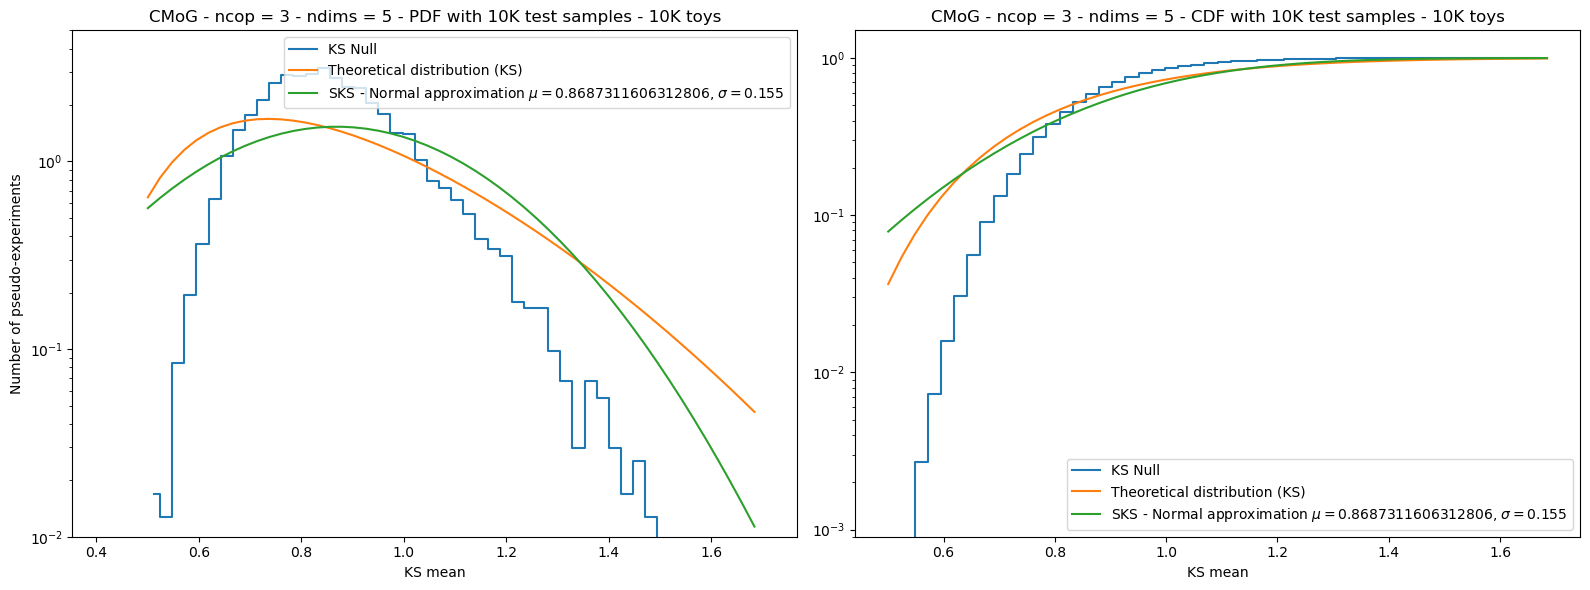

Time elapsed: 0.9893875047564507 seconds.


In [ ]:
start = timer()

nsamples = FPDMetric.Inputs.batch_size_test
niter = FPDMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(FPDMetric.Results[-1].result_value["metric_list"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='FPD Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
ax[0].plot(x, empirical_pdf_norm, label='FPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
ax[0].set_ylim(0.01, 5)
ax[0].set_xlabel('FPD')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='KS Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
ax[1].plot(x, empirical_cdf_norm, label='FPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('FPD')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
[[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]

[[0.68, [6800, 3199], 0.9149967015224115],
 [0.95, [9500, 500], 1.1313706138761246],
 [0.99, [9900, 100], 1.2855206049622938]]

### KPD Test

In [ ]:
KPDMetric.Test_np()
KPDMetric.Results[-1].result_value


------------------------------------------
Starting KPD metric calculation...
niter = 10000
batch_size = 10000


Running numpy KPD calculation...


KeyboardInterrupt: 

In [ ]:
KPDMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_KPD.json")

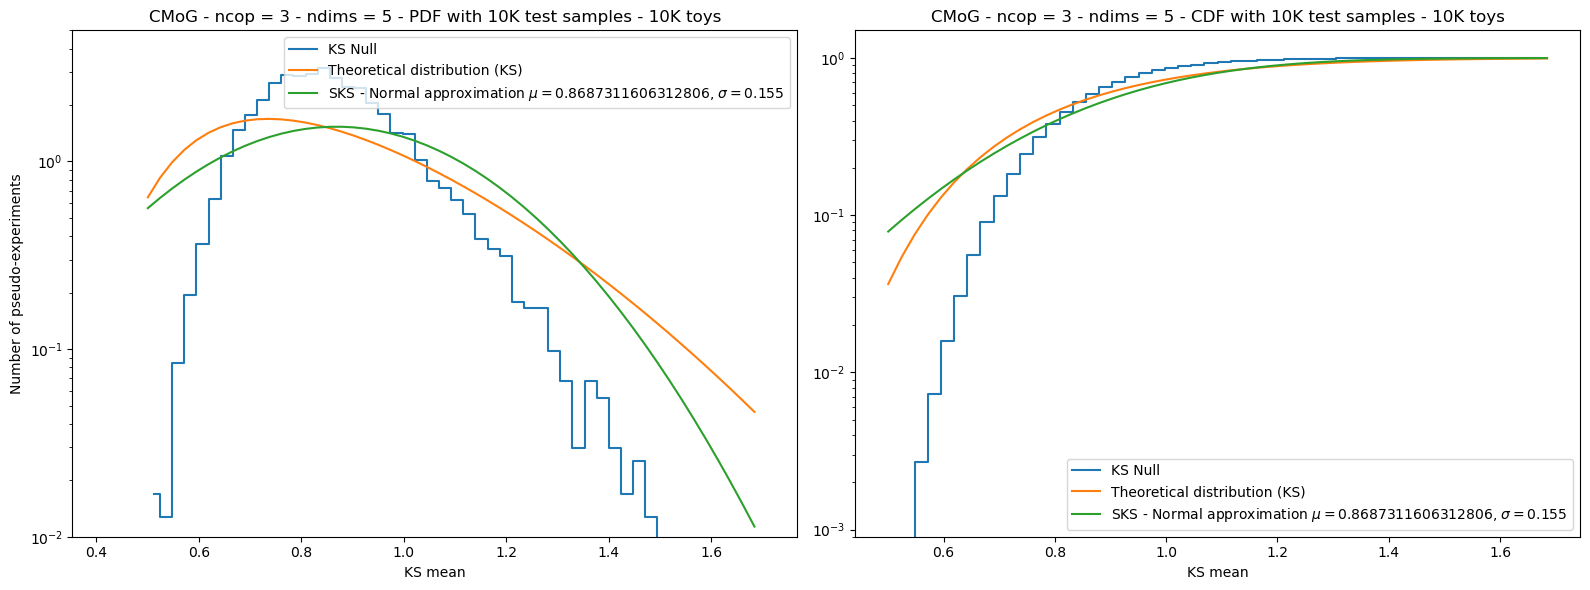

Time elapsed: 0.9893875047564507 seconds.


In [ ]:
start = timer()

nsamples = KPDMetric.Inputs.batch_size_test
niter = KPDMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(KPDMetric.Results[-1].result_value["metric_list"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='KPD Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
ax[0].plot(x, empirical_pdf_norm, label='KPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
ax[0].set_ylim(0.01, 5)
ax[0].set_xlabel('KPD')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='KS Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
ax[1].plot(x, empirical_cdf_norm, label='KPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('KPD')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
[[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]

[[0.68, [6800, 3199], 0.9149967015224115],
 [0.95, [9500, 500], 1.1313706138761246],
 [0.99, [9900, 100], 1.2855206049622938]]

# FN Test Results

In [ ]:
seed = 0
ncomp = 3
ndims = 5
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)


## TensorFlow backend - w/o MirroredStrategy

In [ ]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10_000,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 100000000
batch_size 10000
niter 10000
niter * batch_size 100000000
small_sample False


# Backup

In [ ]:
seed = 0
for ncomp in [3]:
    for nsamples in [1000, 10_000, 100000]:
        for ndims in [4, 8, 16, 32, 64]:
            start = timer()
            result_dict = {}
            seed = seed + 1
            result_dict['ncomp'] = ncomp
            result_dict['ndims'] = ndims
            result_dict['seed'] = seed
            result_dict['nsamples'] = nsamples
            dist = MixtureGaussian(ncomp,ndims,seed)
            niter = 10000
            ns = nsamples**2 /(2*nsamples)
            result_dict['niter'] = niter
            result_dict['ns'] = ns
            sks_means_10, sks_stds_10, sks_dists_10 = [], [], []
            sks_means_100, sks_stds_100, sks_dists_100 = [], [], []
            sks_means_300, sks_stds_300, sks_dists_300 = [], [], []
            sks_means_1000, sks_stds_1000, sks_dists_1000 = [], [], []
            data_mean_cov = []
            s = dist.sample(2*nsamples)
            s1, s2 = s[:nsamples], s[nsamples:]
            _, _, _, sliced_data1_cov_10, _ = sks_2samp_tf(s1,s2, nslices = 10, cov = True) # type: ignore
            _, _, _, sliced_data1_cov_100, _ = sks_2samp_tf(s1,s2, nslices = 100, cov = True) # type: ignore
            _, _, _, sliced_data1_cov_300, _ = sks_2samp_tf(s1,s2, nslices = 300, cov = True) # type: ignore
            _, _, _, sliced_data1_cov_1000, _ = sks_2samp_tf(s1,s2, nslices = 1000, cov = True) # type: ignore
            for i in tqdm(range(niter)):
                s = dist.sample(2*nsamples)
                s1, s2 = s[:nsamples], s[nsamples:]
                sks_mean_1000, sks_std_1000, sks_proj_1000, _, _ = sks_2samp_tf(s1,s2, nslices = 1000, cov = False) # type: ignore
                sks_proj_10 = sks_proj_1000[:10]; sks_mean_10 = tf.reduce_mean(sks_proj_10); sks_std_10 = tf.math.reduce_std(sks_proj_10)
                sks_proj_100 = sks_proj_1000[:100]; sks_mean_100 = tf.reduce_mean(sks_proj_100); sks_std_100 = tf.math.reduce_std(sks_proj_100)
                sks_proj_300 = sks_proj_1000[:300]; sks_mean_300 = tf.reduce_mean(sks_proj_300); sks_std_300 = tf.math.reduce_std(sks_proj_300)
                sks_means_10.append(sks_mean_10); sks_stds_10.append(sks_std_10); sks_dists_10.append(sks_proj_10)
                sks_means_100.append(sks_mean_100); sks_stds_100.append(sks_std_100); sks_dists_100.append(sks_proj_100)
                sks_means_300.append(sks_mean_300); sks_stds_300.append(sks_std_300); sks_dists_300.append(sks_proj_300)
                sks_means_1000.append(sks_mean_1000); sks_stds_1000.append(sks_std_1000); sks_dists_1000.append(sks_proj_1000)
            data_mean_cov = tf.sqrt(tf.reduce_mean(tfp.stats.covariance(s1, sample_axis=0, event_axis=-1))).numpy()
            sliced_data_mean_cov_10 = tf.sqrt(tf.reduce_mean(sliced_data1_cov_10)).numpy()
            sliced_data_mean_cov_100 = tf.sqrt(tf.reduce_mean(sliced_data1_cov_100)).numpy()
            sliced_data_mean_cov_300 = tf.sqrt(tf.reduce_mean(sliced_data1_cov_300)).numpy()
            sliced_data_mean_cov_1000 = tf.sqrt(tf.reduce_mean(sliced_data1_cov_1000)).numpy()
            sks_means_10 = tf.stack(sks_means_10).numpy(); sks_stds_10 = tf.stack(sks_stds_10).numpy(); sks_dists_10 = tf.stack(sks_dists_10).numpy()
            sks_means_100 = tf.stack(sks_means_100).numpy(); sks_stds_100 = tf.stack(sks_stds_100).numpy(); sks_dists_100 = tf.stack(sks_dists_100).numpy()
            sks_means_300 = tf.stack(sks_means_300).numpy(); sks_stds_300 = tf.stack(sks_stds_300).numpy(); sks_dists_300 = tf.stack(sks_dists_300).numpy()
            sks_means_1000 = tf.stack(sks_means_1000).numpy(); sks_stds_1000 = tf.stack(sks_stds_1000).numpy(); sks_dists_1000 = tf.stack(sks_dists_1000).numpy()
            result_dict['10'] = {'sliced_data_mean_cov': sliced_data_mean_cov_10, 'sks_means': sks_means_10, 'sks_stds': sks_stds_10, 'mu': tf.math.reduce_mean(sks_means_10*np.sqrt(ns)).numpy(), 'sigma': tf.math.reduce_std(sks_means_10*np.sqrt(ns)).numpy()}
            result_dict['100'] = {'sliced_data_mean_cov': sliced_data_mean_cov_100, 'sks_means': sks_means_100, 'sks_stds': sks_stds_100, 'mu': tf.math.reduce_mean(sks_means_100*np.sqrt(ns)).numpy(), 'sigma': tf.math.reduce_std(sks_means_100*np.sqrt(ns)).numpy()}
            result_dict['300'] = {'sliced_data_mean_cov': sliced_data_mean_cov_300, 'sks_means': sks_means_300, 'sks_stds': sks_stds_300, 'mu': tf.math.reduce_mean(sks_means_300*np.sqrt(ns)).numpy(), 'sigma': tf.math.reduce_std(sks_means_300*np.sqrt(ns)).numpy()}
            result_dict['1000'] = {'sliced_data_mean_cov': sliced_data_mean_cov_1000, 'sks_means': sks_means_1000, 'sks_stds': sks_stds_1000, 'mu': tf.math.reduce_mean(sks_means_1000*np.sqrt(ns)).numpy(), 'sigma': tf.math.reduce_std(sks_means_1000*np.sqrt(ns)).numpy()}
            
            dict_to_save = Utils.convert_types_dict(result_dict)
            with codecs.open(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.json', "w", encoding="utf-8") as f:
                json.dump(dict_to_save, f, separators=(",", ":"), indent=4)
    
            print("================== ncomp =", ncomp, "ndims =", ndims, "==================")
            print(f"The square root of the mean covariance of the data is {data_mean_cov}")
            print(f"The square root of the mean covariance of the sliced data (10 slices) is {tf.sqrt(tf.reduce_mean(sliced_data1_cov_10))}")
            print(f"The square root of the mean covariance of the sliced data (100 slices) is {tf.sqrt(tf.reduce_mean(sliced_data1_cov_100))}")
            print(f"The square root of the mean covariance of the sliced data (300 slices) is {tf.sqrt(tf.reduce_mean(sliced_data1_cov_300))}")
            print(f"The square root of the mean covariance of the sliced data (1000 slices) is {tf.sqrt(tf.reduce_mean(sliced_data1_cov_1000))}")
            print(f"The estimated mean and variance (10 slices) of the (scaled) SKS statistic are {tf.math.reduce_mean(sks_means_10*np.sqrt(ns))} and {tf.math.reduce_std(sks_means_10*np.sqrt(ns))}")
            print(f"The estimated mean and variance (100 slices) of the (scaled) SKS statistic are {tf.math.reduce_mean(sks_means_100*np.sqrt(ns))} and {tf.math.reduce_std(sks_means_100*np.sqrt(ns))}")
            print(f"The estimated mean and variance (300 slices) of the (scaled) SKS statistic are {tf.math.reduce_mean(sks_means_300*np.sqrt(ns))} and {tf.math.reduce_std(sks_means_300*np.sqrt(ns))}")
            print(f"The estimated mean and variance (1000 slices) of the (scaled) SKS statistic are {tf.math.reduce_mean(sks_means_1000*np.sqrt(ns))} and {tf.math.reduce_std(sks_means_1000*np.sqrt(ns))}")
            print(f"The ratio of the estimated variance (10 slices) of the (scaled) SKS statistic to the square root of the mean covariance of the sliced data is {tf.math.reduce_std(sks_means_10*np.sqrt(ns))/sliced_data_mean_cov_10}")
            print(f"The ratio of the estimated variance (100 slices) of the (scaled) SKS statistic to the square root of the mean covariance of the sliced data is {tf.math.reduce_std(sks_means_100*np.sqrt(ns))/sliced_data_mean_cov_100}")
            print(f"The ratio of the estimated variance (300 slices) of the (scaled) SKS statistic to the square root of the mean covariance of the sliced data is {tf.math.reduce_std(sks_means_300*np.sqrt(ns))/sliced_data_mean_cov_300}")
            print(f"The ratio of the estimated variance (1000 slices) of the (scaled) SKS statistic to the square root of the mean covariance of the sliced data is {tf.math.reduce_std(sks_means_1000*np.sqrt(ns))/sliced_data_mean_cov_1000}")

            scale = 'log'
            num_bins = 50  # number of bins|

            d0 = sks_dists_100[:,0]*np.sqrt(ns)
            d10 = np.mean(sks_dists_10,axis=1)*np.sqrt(ns)
            d100 = np.mean(sks_dists_100,axis=1)*np.sqrt(ns)
            d300 = np.mean(sks_dists_300,axis=1)*np.sqrt(ns)
            d1000 = np.mean(sks_dists_1000,axis=1)*np.sqrt(ns)

            # Compute the mean and standard deviation of the sample and their standard errors
            mu0, deltamu0, sigma0, deltasigma0 = (np.mean(d0), se_mean(d0), np.std(d0), se_std(d0))
            mu10, deltamu10, sigma10, deltasigma10 = (np.mean(d10), se_mean(d10), np.std(d10), se_std(d10))
            mu100, deltamu100, sigma100, deltasigma100 = (np.mean(d100), se_mean(d100), np.std(d100), se_std(d100))
            mu300, deltamu300, sigma300, deltasigma300 = (np.mean(d300), se_mean(d300), np.std(d300), se_std(d300))
            mu1000, deltamu1000, sigma1000, deltasigma1000 = (np.mean(d1000), se_mean(d1000), np.std(d1000), se_std(d1000))

            # Minimum and maximum x values
            min_x = min(d0) # lower limit of the binning
            max_x = max(d0) # upper limit of the binning

            # Create an array of values
            x = np.linspace(min_x, max_x, num_bins + 1)

            # Create histogram for values and normalize counts to sum to 1
            counts0, bin_edges0 = np.histogram(d0, bins=x, density=True); cum_counts0 = np.cumsum(counts0)/np.sum(counts0)
            counts10, bin_edges10 = np.histogram(d10, bins=x, density=True); cum_counts10 = np.cumsum(counts10)/np.sum(counts10)
            counts100, bin_edges100 = np.histogram(d100, bins=x, density=True); cum_counts100 = np.cumsum(counts100)/np.sum(counts100)
            counts300, bin_edges300 = np.histogram(d300, bins=x, density=True); cum_counts300 = np.cumsum(counts300)/np.sum(counts300)
            counts1000, bin_edges1000 = np.histogram(d1000, bins=x, density=True); cum_counts1000 = np.cumsum(counts1000)/np.sum(counts1000)

            # Get the bin centers
            bin_centers0 = (bin_edges0[:-1] + bin_edges0[1:]) / 2
            bin_centers10 = (bin_edges10[:-1] + bin_edges10[1:]) / 2
            bin_centers100 = (bin_edges100[:-1] + bin_edges100[1:]) / 2
            bin_centers300 = (bin_edges300[:-1] + bin_edges300[1:]) / 2
            bin_centers1000 = (bin_edges1000[:-1] + bin_edges1000[1:]) / 2

            # Calculate the theoretical PDF and CDF of the KS distribution for each x value
            theoretical_pdf_ks = kstwobign.pdf(x)
            theoretical_cdf_ks = kstwobign.cdf(x)

            ## Fit SKS to normal
            #def normal_pdf(x, mu, sigma):
            #    return norm.pdf(x, loc=mu, scale=sigma)
            #params_norm, cov_norm = curve_fit(normal_pdf, bin_centers2, counts2, p0=[mu2, sigma2])
            #loc_fit_norm, sigma_fit_norm = params_norm
            #
            ## Calculate the theoretical PDF and CDF of the Normal distribution for each x value
            #empirical_pdf_norm_1 = norm.pdf(x, loc=loc_fit_norm, scale=sigma_fit_norm)
            #empirical_cdf_norm_1 = norm.cdf(x, loc=loc_fit_norm, scale=sigma_fit_norm)
            #
            ## Fit SKS to log-normal
            #def lognormal_pdf(x, scale, s):
            #    return lognorm.pdf(x, scale=scale, s=s)
            #params, cov = curve_fit(lognormal_pdf, bin_centers2, counts2, p0=[mu2, sigma2])
            #scale_fit_lognorm, s_fit_lognorm = params
            #
            #empirical_pdf_lognorm_1 = lognorm.pdf(x, scale=scale_fit_lognorm, s=s_fit_lognorm)
            #empirical_cdf_lognorm_1 = lognorm.cdf(x, scale=scale_fit_lognorm, s=s_fit_lognorm)
            
            # Empirical SKS Normal
            empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=0.155)
            empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=0.155)

            # Set up the figure and the two subplots
            fig, ax = plt.subplots(1, 3, figsize=(25, 6))

            # Draw the first plot
            ax[0].plot(bin_centers0, counts0, linestyle = '-', label='Expected KS', drawstyle='steps-mid')
            ax[0].plot(bin_centers10, counts10, linestyle = '-', label='SKS (10 slices)', drawstyle='steps-mid')
            ax[0].plot(bin_centers100, counts100, linestyle = '-', label='SKS (100 slices)', drawstyle='steps-mid')
            ax[0].plot(bin_centers300, counts300, linestyle = '-', label='SKS (300 slices)', drawstyle='steps-mid')
            ax[0].plot(bin_centers1000, counts1000, linestyle = '-', label='SKS (1000 slices)', drawstyle='steps-mid')
            ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
            ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
            #ax[0].plot(x, empirical_pdf_lognorm_1, label='SKS - Log-Normal fit with scale='+str(round(scale_fit_lognorm,3))+', s='+str(round(s_fit_lognorm,3)))
            ax[0].set_yscale(scale)
            ax[0].set_xlim(0.25, 2)
            ax[0].set_ylim(1e-1, 10)
            ax[0].set_xlabel('KS vs SKS')
            ax[0].set_ylabel('Number of pseudo-experiments')
            ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys - 100 slices')
            ax[0].legend(loc='upper right')

            # Draw the second plot
            ax[1].plot(bin_centers0, cum_counts0, linestyle = '-', label='Expected KS', drawstyle='steps-mid')
            ax[1].plot(bin_centers10, cum_counts10, linestyle = '-', label='SKS (10 slices)', drawstyle='steps-mid')
            ax[1].plot(bin_centers100, cum_counts100, linestyle = '-', label='SKS (100 slices)', drawstyle='steps-mid')
            ax[1].plot(bin_centers300, cum_counts300, linestyle = '-', label='SKS (300 slices)', drawstyle='steps-mid')
            ax[1].plot(bin_centers1000, cum_counts1000, linestyle = '-', label='SKS (1000 slices)', drawstyle='steps-mid')
            ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
            ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
            ax[1].set_yscale(scale)
            ax[1].set_xlim(0.25, 2)
            ax[1].set_ylim(9e-4, 1.5)
            ax[1].set_xlabel('KS vs SKS')
            ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys - 100 slices')
            ax[1].legend(loc='lower right')

            # Draw the third plot
            ax[2].plot(bin_centers0, cum_counts0, linestyle = '-', label='Expected KS', drawstyle='steps-mid')
            ax[2].plot(bin_centers10, cum_counts10, linestyle = '-', label='SKS (10 slices)', drawstyle='steps-mid')
            ax[2].plot(bin_centers100, cum_counts100, linestyle = '-', label='SKS (100 slices)', drawstyle='steps-mid')
            ax[2].plot(bin_centers300, cum_counts300, linestyle = '-', label='SKS (300 slices)', drawstyle='steps-mid')
            ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
            ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
            #ax[2].plot(x, empirical_cdf_lognorm_1, label='SKS - SKS - Log-Normal fit with scale='+str(round(scale_fit_lognorm,3))+', s='+str(round(s_fit_lognorm,3)))
            ax[2].set_yscale(scale)
            ax[2].set_xlim(0.25, 2)
            ax[2].set_ylim(0.8, 1)
            ax[2].set_xlabel('KS vs SKS')
            ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys - 100 slices')
            ax[2].legend(loc='lower right')

            # Adjust the width space
            plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking

            # Display the figure with the two subplots
            plt.tight_layout()
            plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
            plt.show()
            plt.close()
            end = timer()
            print("Time elapsed:", end-start, "seconds.")